# Loan Approval Detection - A classification use-case
In this classification problem we will use classify wether the loan will be approved or not. 
This is a binary classification problem in which we shall find the "Loan Status" as "Yes or No"

In [241]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split

In [242]:
# load and train dataset
train = pd.read_csv("train_data.csv")
test = pd.read_csv("test_data.csv")
submission = pd.read_csv("sample_submission_data.csv")

In [243]:
# Undrestand the datasets
train.shape

(614, 13)

In [244]:
test.shape

(367, 12)

We have 614 rows and 13 columns in training dataset. 367 rows and 12 columns (our target column is not included) in test dataset. 

In [245]:
# First look at the training dataset
train.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Data Preprocessing

In [246]:
# concatenate both datasets for data preprocessing
data = pd.concat([train,test])
# Drop unwanted columns
data.drop("Loan_ID", axis=1,inplace=True)
# identify missing values
data.isnull().sum()

Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [247]:
data= data.loc[~data.index.duplicated()]
# Imputing missing values
for i in [data]:
    i["Gender"] = i["Gender"].fillna(data.Gender.dropna()).mode()[0]
    i["Married"] = i["Married"].fillna(data.Married.dropna()).mode()[0]
    i["Education"] = i["Education"].fillna(data.Education.dropna()).mode()[0]
    i["Dependents"] = i["Dependents"].fillna(data.Dependents.dropna()).mode()[0]
    i["Self_Employed"] = i["Self_Employed"].fillna(data.Self_Employed.dropna()).mode()[0]
    i["Credit_History"] = i["Credit_History"].fillna(data.Credit_History.dropna()).mode()[0]
print(i)

    Gender Married Dependents Education Self_Employed  ApplicantIncome  \
0     Male     Yes          0  Graduate            No             5849   
1     Male     Yes          0  Graduate            No             4583   
2     Male     Yes          0  Graduate            No             3000   
3     Male     Yes          0  Graduate            No             2583   
4     Male     Yes          0  Graduate            No             6000   
..     ...     ...        ...       ...           ...              ...   
609   Male     Yes          0  Graduate            No             2900   
610   Male     Yes          0  Graduate            No             4106   
611   Male     Yes          0  Graduate            No             8072   
612   Male     Yes          0  Graduate            No             7583   
613   Male     Yes          0  Graduate            No             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                  0.0         NaN     

In [248]:
# identify missing values
data.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [249]:
# Using Iterative Imputer we will be filling the missing values for LoanAmount and Loan_Amount_Term

from sklearn.ensemble import RandomForestRegressor
data1 = data.loc[:,['LoanAmount','Loan_Amount_Term']]

# Run the Imputer with a Random Forest 
imp = IterativeImputer(RandomForestRegressor(), max_iter=10,random_state=0)
data1 = pd.DataFrame(imp.fit_transform(data1), columns=data1.columns)

/usr/local/lib/python3.9/site-packages/sklearn/impute/_iterative.py:713: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [250]:
# Map the categorical variables with integers
for i in [data]:
    i["Gender"] = i["Gender"].map({"Male":0,"Female":1}).astype(int)
    i["Married"] = i["Married"].map({"No":0,"Yes":1}).astype(int)
    i["Education"] = i["Education"].map({"No Graduate":0,"Graduate":1}).astype(int)
    i["Self_Employed"] = i["Self_Employed"].map({"No":0,"Yes":1}).astype(int)
    i["Credit_History"] = i["Credit_History"].astype(int)


In [251]:
for i in [data]:
    i["Property_Area"] = i["Property_Area"].map({"Urban":0,"Rural":1,"Semiurban":2}).astype(int)
    i["Dependents"] = i["Dependents"].map({"0":0,"1":1,"2":2,"3+":3})

## Exploratory Data Analysis

In [252]:
new_train = data.iloc[:614]
new_test = data.iloc[614:]

In [253]:
new_train["Loan_Status"] = new_train["Loan_Status"].map({'N':0,'Y':1}).astype(int)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

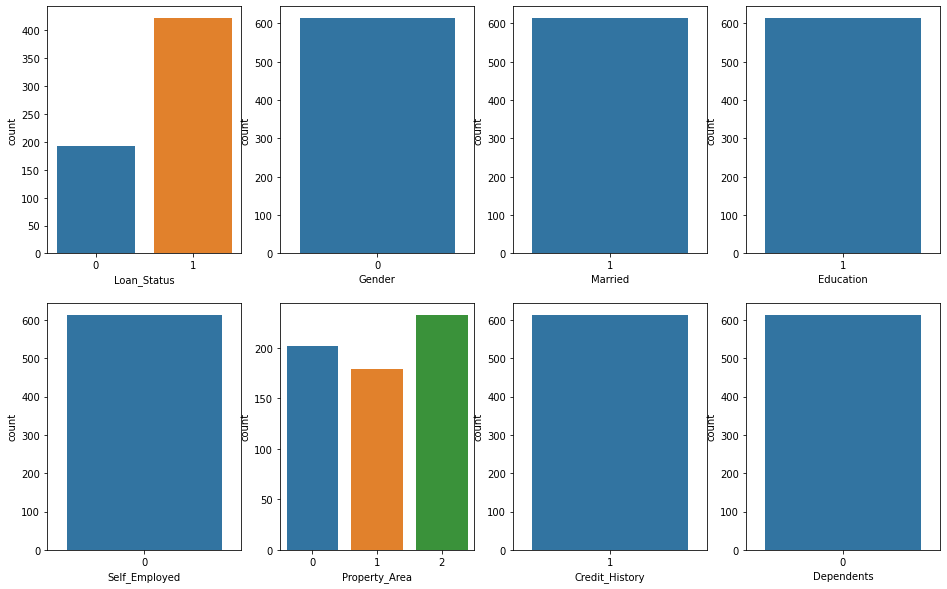

In [254]:
# Univeriate Analysis
fig,ax = plt.subplots(2,4,figsize=(16,10))
sns.countplot(x= 'Loan_Status',data=new_train,ax=ax[0][0])
sns.countplot(x='Gender',data=new_train,ax=ax[0][1])
sns.countplot(x='Married',data=new_train,ax=ax[0][2])
sns.countplot(x='Education',data=new_train,ax=ax[0][3])
sns.countplot(x='Self_Employed',data=new_train,ax=ax[1][0])
sns.countplot(x='Property_Area',data=new_train,ax=ax[1][1])
sns.countplot(x='Credit_History',data=new_train,ax=ax[1][2])
sns.countplot(x='Dependents',data=new_train,ax=ax[1][3])

## BiVariate Analysis

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

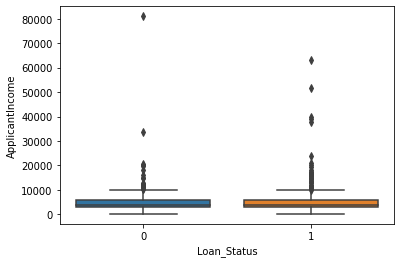

In [255]:
sns.boxplot(x='Loan_Status' , y='ApplicantIncome', data=new_train)

<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

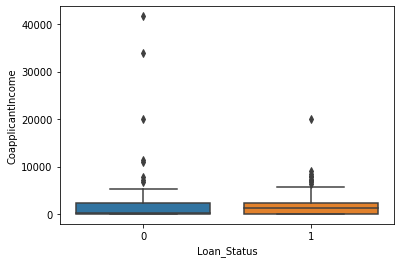

In [256]:
sns.boxplot(x='Loan_Status', y='CoapplicantIncome', data=new_train)

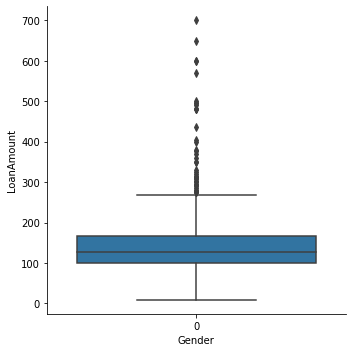

In [257]:
sns.catplot(x='Gender', y='LoanAmount', data=new_train,kind='box')

<function matplotlib.pyplot.show(close=None, block=None)>

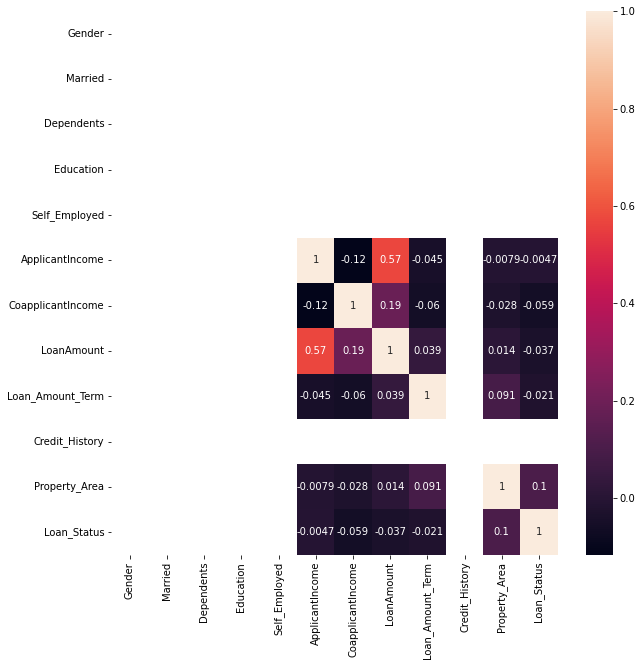

In [258]:
# Corelation Matrix
plt.figure(figsize = (10,10))
correlation_matrix = new_train.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show

## Feature Engineering

In [259]:
# Total Income
for i in [data]:
    i["TotalIncome"] = i["ApplicantIncome"]+i["CoapplicantIncome"]

In [260]:
r = 0.00833
data['EMI'] = data.apply(lambda x: (x['LoanAmount']*r*((1+r)**x['Loan_Amount_Term']))/((1+r)**((x['Loan_Amount_Term'])-1)),axis=1)

In [263]:
data['Dependents_EMI_mean'] = data.groupby(['Dependents'])['EMI'].transform('mean')

data['LoanAmount_per_TotalIncome'] = data['LoanAmount'] / data['TotalIncome']

data['LoanAmount_Term_per_TotalIncome'] = data['Loan_Amount_Term'] / data['TotalIncome']

data['EMI_per_Loan_Amount_Term'] = data['EMI'] / data['Loan_Amount_Term']

data['EMI_per_LoanAmount'] = data['EMI'] / data['LoanAmount']

data['property_Area_LoanAmount_per_TotalIncome_mean'] = data.groupby(['Property_Area'])['LoanAmount_per_TotalIncome'].transform('mean')

data['Credit_History_Icome_Sum'] = data.groupby(['Credit_History'])['TotalIncome'].transform('sum')

data['Dependents_LoanAmount_Sum'] = data.groupby(['Dependents'])['LoanAmount'].transform('sum')

In [265]:
data = data.drop(['EMI'],axis=1)
data = data.drop(['TotalIncome'],axis=1)
data = data.drop(['LoanAmount_per_TotalIncome'],axis=1)

In [266]:
new_train.shape

(614, 12)

## Building ML Model

In [269]:
x = new_train.drop("Loan_Status",axis=1)
y = new_train["Loan_Status"]

In [270]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

x_train.shape

x_test.shape

(185, 11)

In [278]:
import sklearn.metrics as sm
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression()
from sklearn.model_selection import cross_val_score
cross_val_score(log_clf,x_train,y_train,scoring= sm.make_scorer(sm.accuracy_score),cv=3)

predo = log_clf.fit(x_train,y_train).predict(x_test)
sm.accuracy_score(predo,y_test)

ValueError: 
All the 3 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1138, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.9/site-packages/sklearn/base.py", line 596, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py", line 1074, in check_X_y
    X = check_array(
  File "/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py", line 899, in check_array
    _assert_all_finite(
  File "/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py", line 146, in _assert_all_finite
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values
